In [39]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [41]:
img = cv.imread('bap.jpeg')
assert img is not None, "file could not be read"

In [42]:
#Resize
res = cv.resize(img, None, fx=3, fy=2, interpolation=cv.INTER_CUBIC)

In [43]:
#Rotation
rows, cols, _ = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 180, 1)
rotated = cv.warpAffine(img, M, (cols, rows))

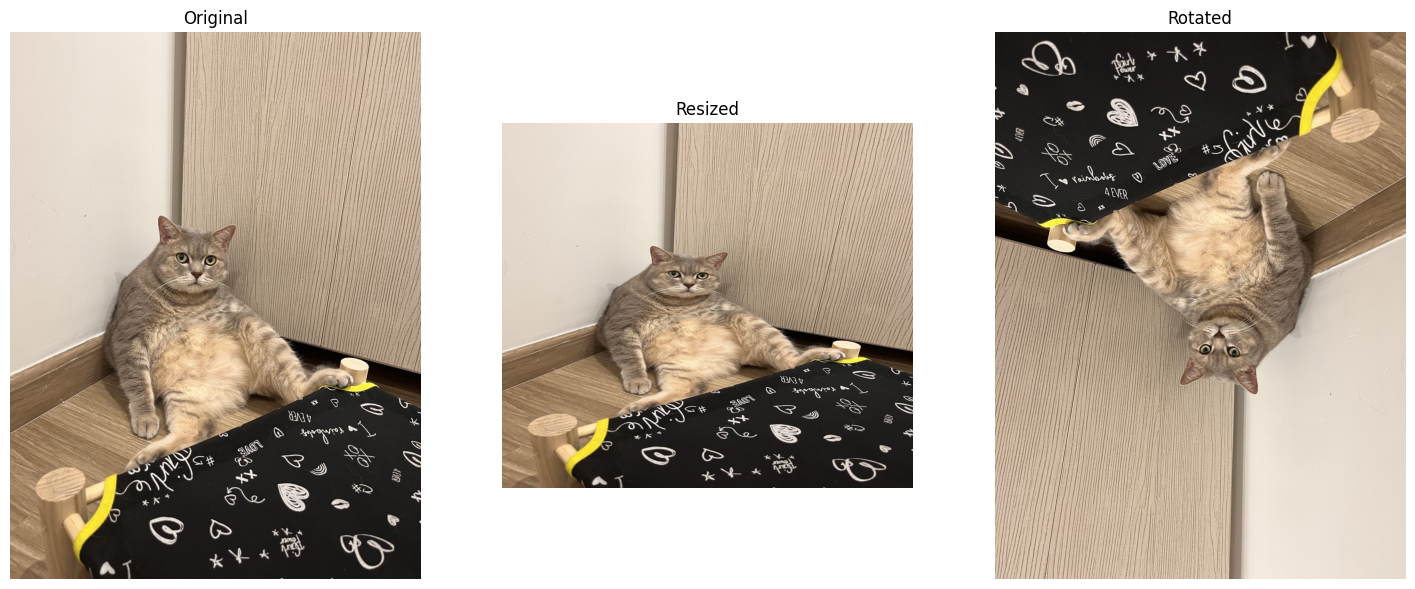

In [44]:
plt.figure(figsize=(18, 12))
#Raw image
plt.subplot(131), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Original')
plt.axis('off')

#Resized image
plt.subplot(132), plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB)), plt.title('Resized')
plt.axis('off')

#Rotation image
plt.subplot(133), plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB)), plt.title('Rotated')
plt.axis('off')

plt.show()

In [45]:
imgs = cv.imread('draw.jpeg')
assert img is not None, "file could not be read"

In [46]:
#Affine Transformation
rows,cols,ch = imgs.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(imgs,M,(cols,rows))


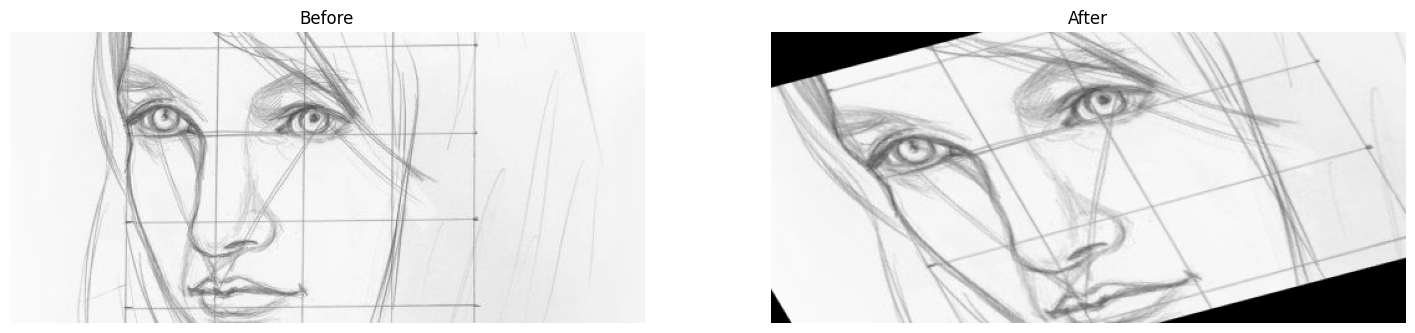

In [47]:
plt.figure(figsize=(18, 12))
plt.subplot(121),plt.imshow(imgs),plt.title('Before')
plt.axis('off')
plt.subplot(122),plt.imshow(dst),plt.title('After')
plt.axis('off')

plt.show()

# Perspective Transformation

#để lấy các corners chúng ta dùng đoạn mã sau:

import cv2

import numpy as np

img_path = 'vinfast.jpeg'

ori_img = cv2.imread(img_path)

src = []  

#mouse callback handler

def mouse_handler(event, x, y, flags, param):

    if event == cv2.EVENT_LBUTTONUP:  

        img = ori_img.copy()

        src.append([x, y])

        for xx, yy in src:

            cv2.circle(img, center=(xx, yy), radius=5, color=(0, 255, 0), thickness=-1)

        cv2.imshow('Original Image', img)

        #perspective transform

        if len(src) == 4:

            src_np = np.array(src, dtype=np.float32)

            print("original points : \n", src_np)

cv2.namedWindow('Original Image')

cv2.setMouseCallback('Original Image', mouse_handler)  

cv2.imshow('Original Image', ori_img)

if cv2.waitKey(0) == 32:

    cv2.destroyAllWindows()


In [48]:
ori_img = cv.imread('vinfast.jpeg')

src = []  # Coordinates of the four corners: top-left, top-right, bottom-right, bottom-left
src.append([130, 347])
src.append([234, 354])
src.append([234, 375])
src.append([131, 370])


In [49]:
# Convert corners to float32 array
src_np = np.array(src, dtype=np.float32)

# Calculate width and height of the rectangle
width = max(np.linalg.norm(src_np[0] - src_np[1]), np.linalg.norm(src_np[2] - src_np[3]))
height = max(np.linalg.norm(src_np[0] - src_np[3]), np.linalg.norm(src_np[1] - src_np[2]))

# Calculate width and height ratios to maintain the aspect ratio
width_ratio = (width / height)
height_ratio = 1

# Define destination corners after scaling
dst_np = np.array([[0, 0], [int(width_ratio * 300), 0], [int(width_ratio * 300), int(height_ratio * 300)], [0, int(height_ratio * 300)]], dtype=np.float32)

# Get the perspective transformation matrix
M = cv.getPerspectiveTransform(src=src_np, dst=dst_np)

# Apply perspective transformation
result = cv.warpPerspective(ori_img, M=M, dsize=(int(width_ratio * 300), int(height_ratio * 300)))


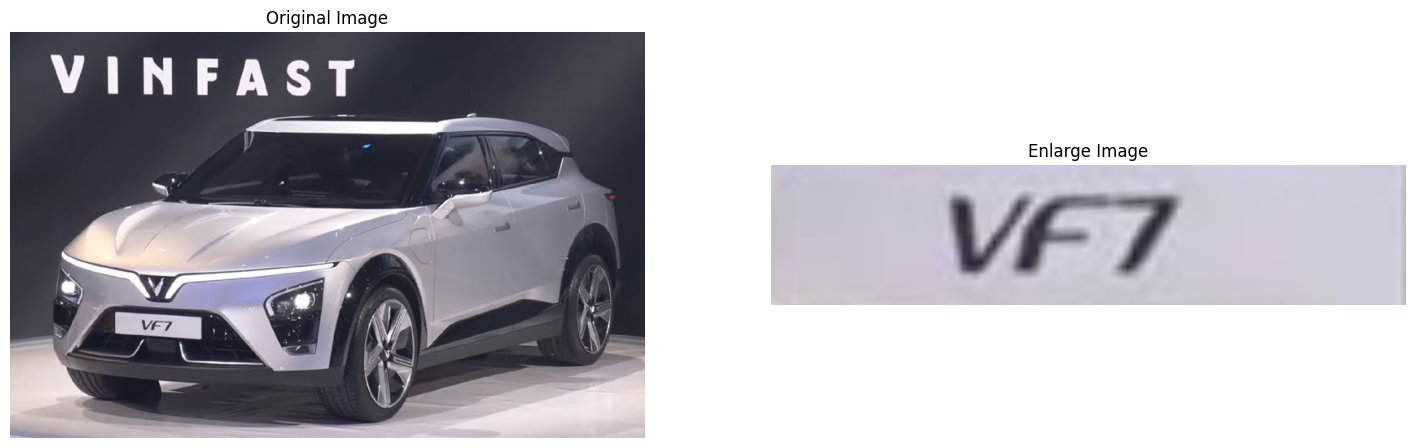

In [50]:
plt.figure(figsize=(18, 12))
# Create subplots
plt.subplot(121), plt.imshow(cv.cvtColor(ori_img, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off')

plt.subplot(122), plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB)), plt.title('Enlarge Image')
plt.axis('off')

# Show the subplots
plt.show()